In [1]:

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
import pandas as pd
df = pd.read_csv('Preprocessed reviews.csv')

In [3]:
df.head()

,Reviews,description_lengths
0,"For me,it is Kamila Shamsie's second best book...",348
1,A novel with great scope ranging over a vast s...,412
2,"""Burnt Shadows"" was a gift to me from a friend...",322
3,'Why? Can't women travel alone in India?'Eliza...,1120
4,She had not thought of destination so much as ...,1340


In [4]:
df['scores'] = df['Reviews'].apply(lambda review: analyser.polarity_scores(review))

df.head()

,Reviews,description_lengths,scores
0,"For me,it is Kamila Shamsie's second best book...",348,"{'neg': 0.084, 'neu': 0.817, 'pos': 0.099, 'co..."
1,A novel with great scope ranging over a vast s...,412,"{'neg': 0.127, 'neu': 0.703, 'pos': 0.171, 'co..."
2,"""Burnt Shadows"" was a gift to me from a friend...",322,"{'neg': 0.207, 'neu': 0.673, 'pos': 0.121, 'co..."
3,'Why? Can't women travel alone in India?'Eliza...,1120,"{'neg': 0.055, 'neu': 0.82, 'pos': 0.125, 'com..."
4,She had not thought of destination so much as ...,1340,"{'neg': 0.094, 'neu': 0.791, 'pos': 0.116, 'co..."


In [5]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,Reviews,description_lengths,scores,compound
0,"For me,it is Kamila Shamsie's second best book...",348,"{'neg': 0.084, 'neu': 0.817, 'pos': 0.099, 'co...",0.7212
1,A novel with great scope ranging over a vast s...,412,"{'neg': 0.127, 'neu': 0.703, 'pos': 0.171, 'co...",0.9433
2,"""Burnt Shadows"" was a gift to me from a friend...",322,"{'neg': 0.207, 'neu': 0.673, 'pos': 0.121, 'co...",-0.9932
3,'Why? Can't women travel alone in India?'Eliza...,1120,"{'neg': 0.055, 'neu': 0.82, 'pos': 0.125, 'com...",0.9979
4,She had not thought of destination so much as ...,1340,"{'neg': 0.094, 'neu': 0.791, 'pos': 0.116, 'co...",0.9927


In [6]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df['Sentiment'] = df['compound'].apply(Sentimnt)

df.head()

,Reviews,description_lengths,scores,compound,Sentiment
0,"For me,it is Kamila Shamsie's second best book...",348,"{'neg': 0.084, 'neu': 0.817, 'pos': 0.099, 'co...",0.7212,Positive
1,A novel with great scope ranging over a vast s...,412,"{'neg': 0.127, 'neu': 0.703, 'pos': 0.171, 'co...",0.9433,Positive
2,"""Burnt Shadows"" was a gift to me from a friend...",322,"{'neg': 0.207, 'neu': 0.673, 'pos': 0.121, 'co...",-0.9932,Negative
3,'Why? Can't women travel alone in India?'Eliza...,1120,"{'neg': 0.055, 'neu': 0.82, 'pos': 0.125, 'com...",0.9979,Positive
4,She had not thought of destination so much as ...,1340,"{'neg': 0.094, 'neu': 0.791, 'pos': 0.116, 'co...",0.9927,Positive


In [9]:
import seaborn as sns
var1 = df.groupby('Sentiment').count()['Reviews'].reset_index().sort_values(by='Reviews',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,Sentiment,Reviews
1,Positive,8
0,Negative,5


<Axes: xlabel='Sentiment', ylabel='count'>

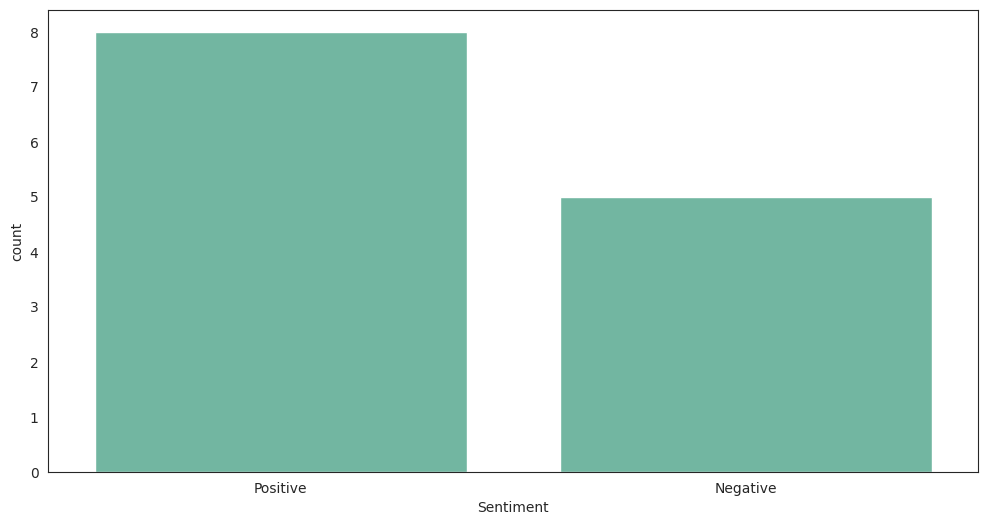

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df)

In [13]:
from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text =var1.Sentiment,
    values = var1.Reviews,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import re

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

In [15]:
from collections import Counter
df['temp_list'] = df['Reviews'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
#temp.style.background_gradient(cmap='Blues')

In [17]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [18]:
# Tree of the most common words
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

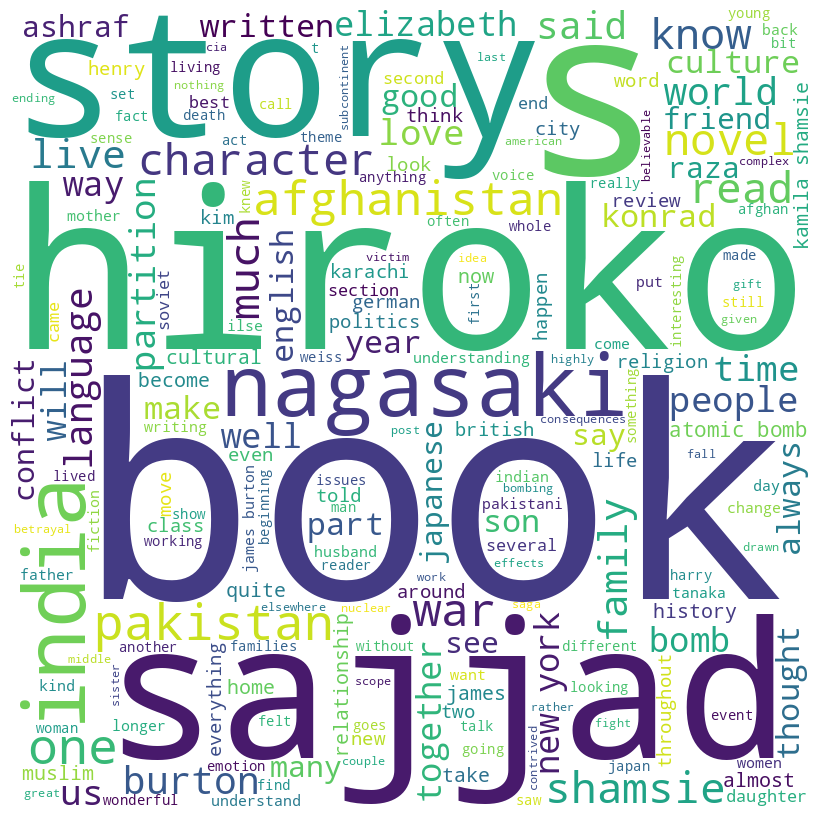

In [22]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Reviews:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("WordCloud.png")
plt.show()

In [23]:
df.to_csv('Analysed_Reviews.csv', index=False)